### Import required libraries 

In [48]:
import pandas as pd
import numpy as np
import random as rnd

In [49]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

In [51]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Analyse data 

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Remove unncessary columns 

In [53]:
# PassengerId is not relevant and Cabin has too many missing values 
train.drop(columns=['PassengerId','Cabin','Ticket'],inplace=True)

### Univariate Analysis

#### Categorical Variables 

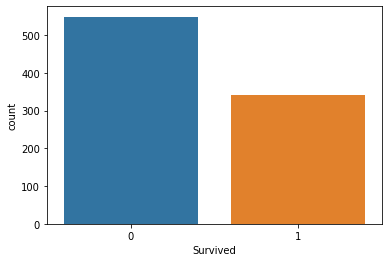

In [54]:
sns.countplot('Survived', data = train)

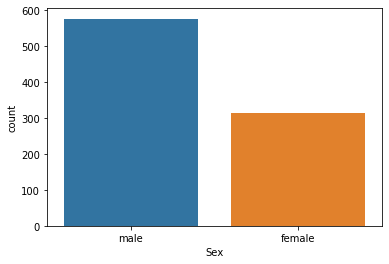

In [55]:
sns.countplot('Sex',data = train)

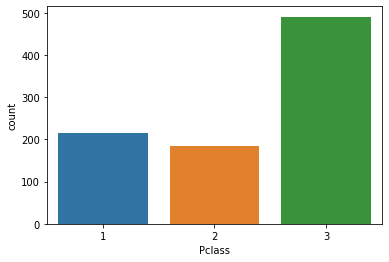

In [56]:
sns.countplot('Pclass',data = train)

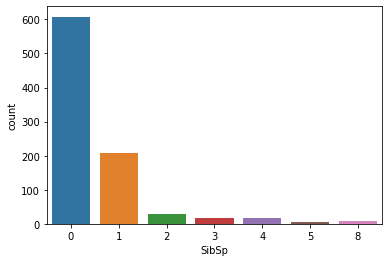

In [57]:
sns.countplot('SibSp',data = train)

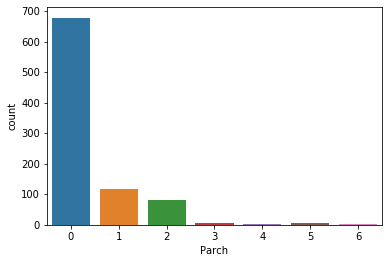

In [58]:
sns.countplot('Parch',data = train)

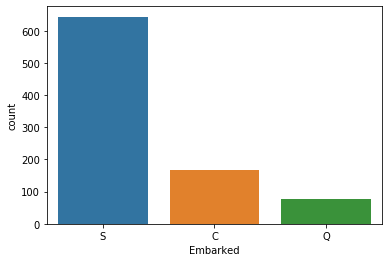

In [59]:
sns.countplot('Embarked',data = train)

### Univariate for Continuous variables

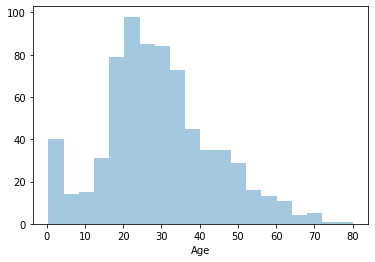

In [60]:
sns.distplot(train.Age, kde=False)

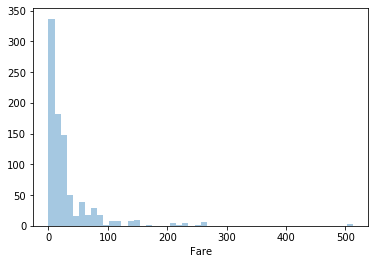

In [61]:
sns.distplot(train.Fare, kde=False)

## Bivariate Analysis

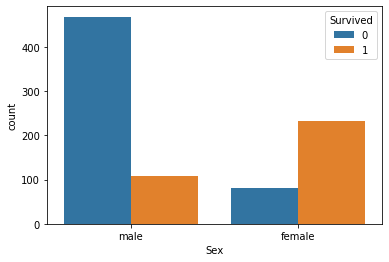

In [62]:
sns.countplot(x='Sex',data=train, hue='Survived')

In [63]:
## Draw histogram based on Age for survived and non-survived

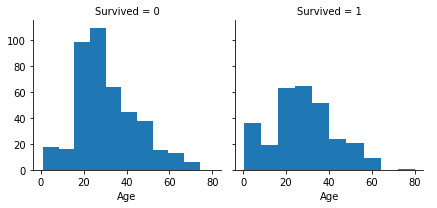

In [64]:
grid = sns.FacetGrid(train, col='Survived')
grid.map(plt.hist, 'Age')
grid.add_legend()

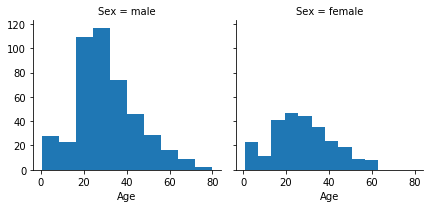

In [65]:
grid = sns.FacetGrid(train, col='Sex')
grid.map(plt.hist, 'Age')
grid.add_legend()

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


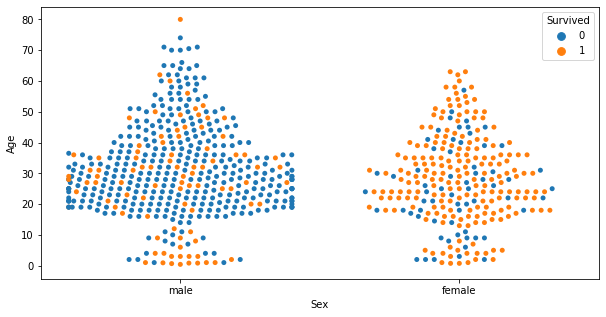

In [66]:
## Relationship between Survived, Age and Sex
sns.swarmplot(x="Sex", y="Age", hue="Survived", data=train)
plt.gcf().set_size_inches(10,5)

In [67]:
### Draw relationship between Pclass and Survived

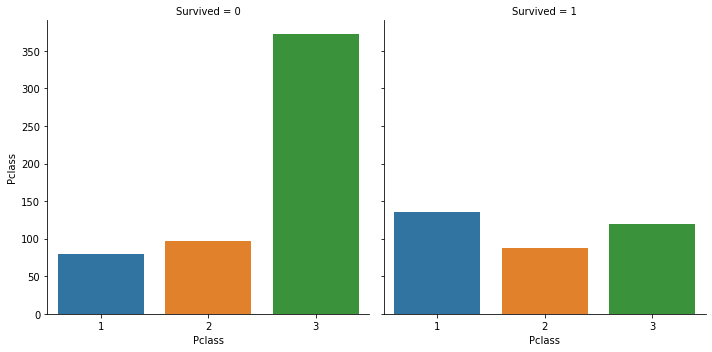

In [68]:
sns.catplot(x="Pclass",y="Pclass", kind='bar',estimator=len,data=train, col="Survived")

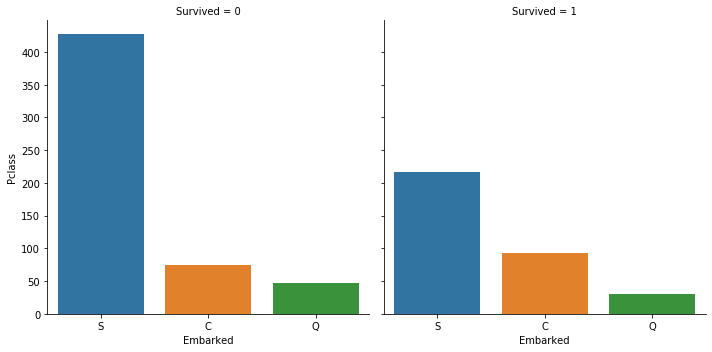

In [69]:
sns.catplot(x="Embarked",y="Pclass", kind='bar',estimator=len,data=train, col="Survived")

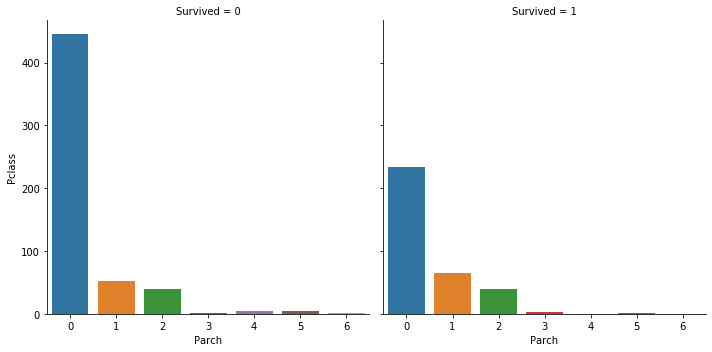

In [70]:
sns.catplot(x="Parch",y="Pclass", kind='bar',estimator=len,data=train, col="Survived")

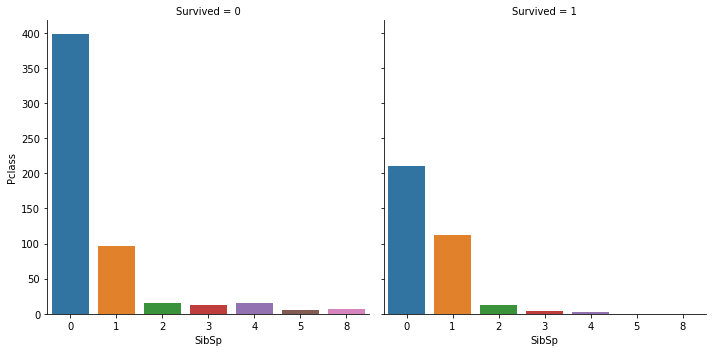

In [71]:
sns.catplot(x="SibSp",y="Pclass", kind='bar',estimator=len,data=train, col="Survived")

## Data Wrangline

In [72]:
# find out columns with missing values
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [73]:
# Encode Sex
train.Sex = train.Sex.replace(['male','female'],[1,0])

In [74]:
# Create a column Title from name
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

In [75]:
train['Title'] = train['Title'].replace(['Mlle', 'Ms'],'Miss')
train['Title'] = train['Title'].replace('Mme','Mrs')

In [76]:
train.Title.value_counts()

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Col           2
Major         2
Sir           1
Capt          1
Lady          1
Countess      1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [77]:
## Impute ages from average age of the Title
avg_age = train.groupby('Title')['Age'].mean()
def get_avg_age(title):
    return  round(avg_age[title],0)

In [78]:
train.loc[train.Age.isna(), 'Age'] = train.loc[train.Age.isna(),'Title'].apply(get_avg_age)

In [79]:
train.Age.isna().sum()

0

In [80]:
# Replace Embarked with mode
train['Embarked'].fillna(train.Embarked.mode()[0], inplace=True)

In [81]:
# Encode Embarked
train.Embarked = train.Embarked.replace(['S','C','Q'],[1,0,2])

In [82]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [83]:
# Remove name 
train.drop(columns= ['Name'], inplace=True)

In [84]:
train.sample(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
624,0,3,1,21.0,0,0,16.1000,1,Mr
379,0,3,1,19.0,0,0,7.7750,1,Mr
115,0,3,1,21.0,0,0,7.9250,1,Mr
142,1,3,0,24.0,1,0,15.8500,1,Mrs
347,1,3,0,36.0,1,0,16.1000,1,Mrs
468,0,3,1,32.0,0,0,7.7250,2,Mr
428,0,3,1,32.0,0,0,7.7500,2,Mr
830,1,3,0,15.0,1,0,14.4542,0,Mrs
270,0,1,1,32.0,0,0,31.0000,1,Mr
434,0,1,1,50.0,1,0,55.9000,1,Mr


#### Save final data

In [85]:
train.to_csv("final_train.csv", index=False)